# Exploratory Data Analysis (Formatted Zone)

In [16]:
from database_settings import postgres_utilities
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Seaborn setup
sns.set_style("darkgrid")

In [18]:
# Establish the connection with the Persistent Zone
engine = postgres_utilities.engine()

Connected to Formatted Zone successfully!


## Explore filtering approaches

In [19]:
# See the distribution of rows with respect to boarding_date
exports_year = postgres_utilities.run_query_file(engine, './queries/boarding_date_year.sql')
exports_year = pd.DataFrame(exports_year).sort_values(by='year', ascending=True)
exports_year

,year,count,proportion
9,2010,1,0.0001
11,2011,8,0.0005
2,2013,48,0.0033
5,2014,287,0.0195
7,2015,639,0.0435
3,2016,30207,2.0555
1,2017,165630,11.2706
4,2018,203696,13.8608
10,2019,213809,14.5490
6,2020,210062,14.2940


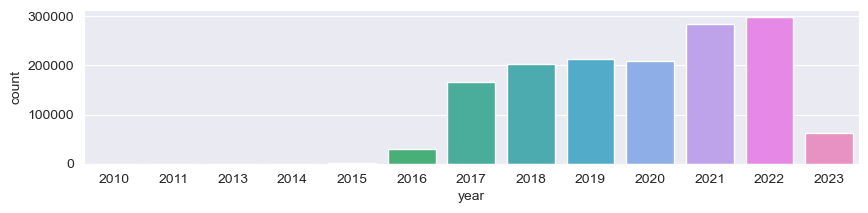

In [20]:
# Bar chart
plt.figure(figsize=(10,2))
sns.barplot(x='year', y='count', data=exports_year)
plt.show()

In [21]:
# Defining the filters
# net weight: See the percentage of data kept if you set a filter based on the net weight
net_weight_threshold = 100
proportion = postgres_utilities.run_query_file(engine,
                                           './queries/net_weight_filter_definition.sql',
                                           params={'net_weight_threshold': net_weight_threshold})
proportion = round(float(proportion[0][0])*100,2)
print("Net weight: By removing those exports with a net weight of less than {}kg, we keep {}% of the data.".format(net_weight_threshold, proportion))

# value_usd: See the percentage of data kept if you set a filter based on the usd_value
value_usd_threshold = 200
proportion = postgres_utilities.run_query_file(engine,
                                           './queries/value_usd_filter_definition.sql',
                                           params={'value_usd_threshold': value_usd_threshold})
proportion = round(float(proportion[0][0])*100,2)
print("Usd value: By removing those exports with a value of less than ${}, we keep {}% of the data.".format(value_usd_threshold, proportion))

# heading: See the percentage and count of data kept if you set a filter based on the count of headings
headings_count_threshold = 100
proportion = postgres_utilities.run_query_file(engine,
                                           './queries/headings_count_filter_definition_1.sql',
                                           params={'headings_count_threshold': headings_count_threshold})
proportion = round(float(proportion[0][0])*100,2)
count = postgres_utilities.run_query_file(engine,
                                           './queries/headings_count_filter_definition_2.sql',
                                           params={'headings_count_threshold': headings_count_threshold})
print("Heading: By removing those exports whose heading's count is less than {}, we keep {}% of the data. That is {} from {} headings.".format(headings_count_threshold, proportion, count[0][0], count[0][1]))


# boarding_date: See the percentage of data kept if you set a filter based on the boarding_date
year_threshold = 2017
proportion = postgres_utilities.run_query_file(engine,
                                           './queries/boarding_date_filter_definition.sql',
                                           params={'year_threshold': year_threshold})
proportion = round(float(proportion[0][0])*100,2)
print("Boarding date: By removing those exports with a boarding date before {}, we keep {}% of the data.".format(year_threshold, proportion))

Net weight: By removing those exports with a net weight of less than 100kg, we keep 96.72% of the data.
Usd value: By removing those exports with a value of less than $200, we keep 96.83% of the data.
Heading: By removing those exports whose heading's count is less than 100, we keep 99.89% of the data. That is 100 from 169 headings.
Boarding date: By removing those exports with a boarding date before 2017, we keep 97.88% of the data.


In [22]:
# Get the data after all the filters
proportion = postgres_utilities.run_query_file(engine,
                                           './queries/filtered_data_definition.sql',
                                           params={'year_threshold': year_threshold,
                                                   'headings_count_threshold': headings_count_threshold,
                                                   'value_usd_threshold': value_usd_threshold,
                                                   'net_weight_threshold': net_weight_threshold})
proportion = round(float(proportion[0][0])*100,2)
print("All filters: By applying all filtering approaches we keep {}% of the data.".format(proportion))

All filters: By applying all filtering approaches we keep 94.15% of the data.


## Get a heading's time series

In [24]:
# Get the filtered data
result = postgres_utilities.run_query_file(engine,
                                           './queries/heading_data.sql',
                                           params={'year_threshold': year_threshold,
                                                   'headings_count_threshold': headings_count_threshold,
                                                   'value_usd_threshold': value_usd_threshold,
                                                   'net_weight_threshold': net_weight_threshold})
df = pd.DataFrame(result)
df

,heading,description,details,net_weight,gross_weight,value_usd,country,boarding_date,batch_week
0,0804502000,Mangos y mangostanes frescos o secos,MANGO FRESCO EN CAJAS SE ACOGE AL DRAWBACK,6000.000,7263.000,12663.600,JP,2017-01-01,31060817
1,0804502000,Mangos y mangostanes frescos o secos,MANGO FRESCO EN CAJAS SE ACOGE AL DRAWBACK,2363.000,2818.000,8032.450,KR,2017-01-01,31060817
2,0804502000,Mangos y mangostanes frescos o secos,MANGO FRESCO EN CAJAS SE ACOGE AL DRAWBACK,2160.000,2629.000,6300.000,JP,2017-01-01,31060817
3,0804502000,Mangos y mangostanes frescos o secos,MANGO FRESCO EN CAJAS SE ACOGE AL DRAWBACK,5600.000,6703.000,18751.600,KR,2017-01-01,31060817
4,0709200000,Espárragos frescos o refrigerados,ESPARRAGOS FRESCOS EN CAJAS DRAWBACK,4280.000,4765.000,12628.000,US,2017-01-01,02080117
...,...,...,...,...,...,...,...,...,...
1383565,0713509000,"Habas (Vicia faba var. major), haba caballar (...","HABAS SECAS X 50 KG, C/SACOSEMBALADOS EN 151 S...",7550.000,7581.874,5134.000,EC,2023-04-13,10160423
1383566,0714100000,"Raíces de yuca (mandioca) frescos, refrigerado...",YUCA FRESCA- EN CAJAS YUCA FRESCA- EN CAJA...,20548.000,21482.000,4203.000,CL,2023-04-13,10160423
1383567,0711200000,Aceitunas conservadas provisionalmente para co...,ACEITUNA VERDE EN SALMUERAEN BIDONES ACEITUNA ...,16800.000,27300.000,10080.000,CL,2023-04-14,10160423
1383568,0703100000,Cebollas y chalotes frescos o refrigerados,CEBOLLA ROJA FRESCA- EN MALLAS CEBOLLA ROJA...,20400.000,20440.000,1632.000,CL,2023-04-14,10160423


In [106]:
# Make time series of a heading
heading = '0806100000'

In [107]:
heading_data = df[df['heading']==heading].copy()
# Get usd_kg
heading_data['usd_kg'] = heading_data['value_usd']/heading_data['net_weight']
heading_data['usd_kg'] = heading_data['usd_kg'].astype(float)
heading_data['usd_kg'] = heading_data['usd_kg'].round(3)

In [108]:
# Make uds_kg time series
# Group by boarding_date
usd_kg = heading_data[['boarding_date','usd_kg']].groupby(by=['boarding_date']).mean().round(3)
# Impute missing dates assigning the usd_kg of the day before
usd_kg.index = pd.to_datetime(usd_kg.index)
usd_kg = usd_kg.resample('D').ffill()
usd_kg

,usd_kg
boarding_date,
2017-01-02,1.878
2017-01-03,2.216
2017-01-04,2.691
2017-01-05,2.086
2017-01-06,2.501
...,...
2023-04-07,2.222
2023-04-08,2.222
2023-04-09,2.222


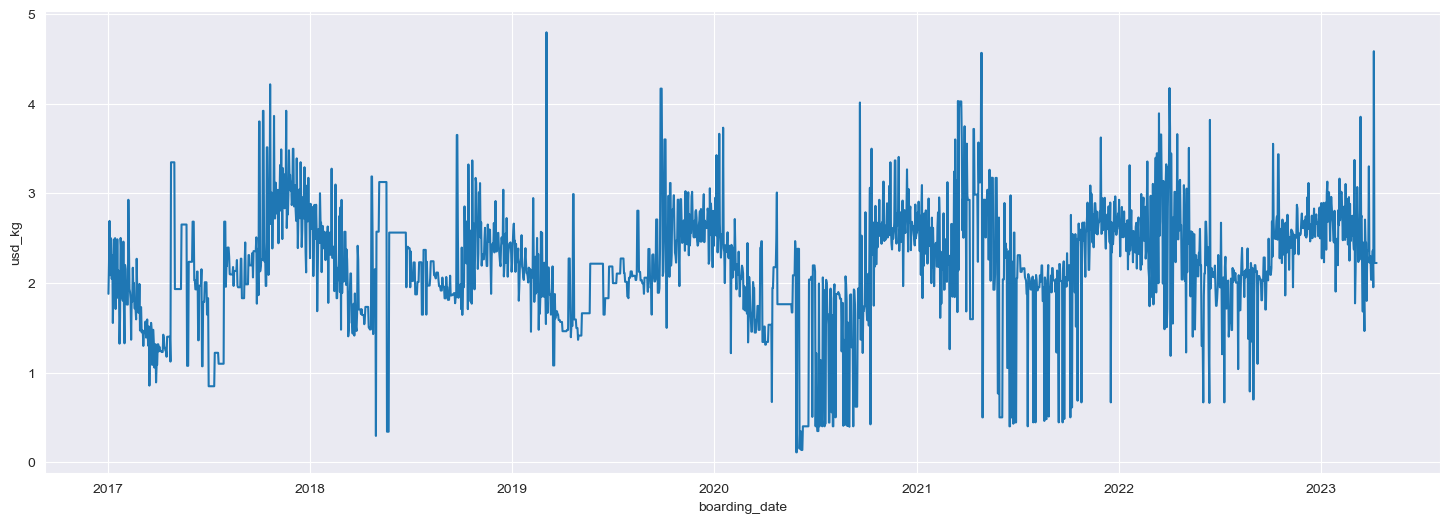

In [109]:
plt.figure(figsize=(18,6))
sns.lineplot(x="boarding_date", y="usd_kg", data=usd_kg)
plt.show()